In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os, glob
import seaborn as sns
from scipy.optimize import curve_fit
plt.style.use("seaborn-whitegrid")
#plt.style.use("classic")
cm = 1/2.54

In [72]:
#conff0 = glob.glob('may_data/md10/data_A0**.txt')
#conff0 = glob.glob('may_data/md20/data_A0**.txt')
#conff0 = glob.glob('may_data/md30/data_A0**.txt')
#conff0 = glob.glob('may_data/md40/data_A0**.txt')
conff0 = glob.glob('may_data/md50/data_A0**.txt')
conff0 = sorted(conff0)

In [73]:
conff0

['may_data/md50/data_A001.txt',
 'may_data/md50/data_A002.txt',
 'may_data/md50/data_A003.txt',
 'may_data/md50/data_A004.txt',
 'may_data/md50/data_A005.txt',
 'may_data/md50/data_A006.txt',
 'may_data/md50/data_A007.txt',
 'may_data/md50/data_A008.txt',
 'may_data/md50/data_A009.txt',
 'may_data/md50/data_A010.txt',
 'may_data/md50/data_A011.txt',
 'may_data/md50/data_A012.txt',
 'may_data/md50/data_A013.txt',
 'may_data/md50/data_A014.txt',
 'may_data/md50/data_A015.txt',
 'may_data/md50/data_A016.txt',
 'may_data/md50/data_A017.txt',
 'may_data/md50/data_A018.txt',
 'may_data/md50/data_A019.txt',
 'may_data/md50/data_A020.txt',
 'may_data/md50/data_A021.txt',
 'may_data/md50/data_A022.txt',
 'may_data/md50/data_A023.txt',
 'may_data/md50/data_A024.txt',
 'may_data/md50/data_A025.txt',
 'may_data/md50/data_A026.txt',
 'may_data/md50/data_A027.txt',
 'may_data/md50/data_A028.txt',
 'may_data/md50/data_A029.txt',
 'may_data/md50/data_A030.txt']

In [74]:
beads = 0; 

#jmp = 1 ; dt = 'dt0'; Dt = 0.1
#jmp = 10 ; dt = 'dt0'; Dt = 1 
#jmp = 20 ; dt = 'dt0'; Dt = 2
jmp = 30 ; dt = 'dt0'; Dt = 3
v00 = 0.8

v0 = 7.0; v_1 = 7.7; v1 = 7.8

conf0 = [];
xy0 = []; xy_1 = []; xy1 = [];
xdiff0 = []; ydiff0 = []; 

for i in conff0:
    _ = pd.read_csv(i, names=['t','x','y','z'], delim_whitespace=True)
    #xy0_ = _[0::beads]
    xy0.append(_)
    _ = _[0::jmp]
    conf0.append(_)
    xdiff0.append(np.diff(_['x']))
    ydiff0.append(np.diff(_['y']))


In [75]:
conf0[0].shape

(10, 4)

In [76]:
xdiff0[0].shape

(9,)

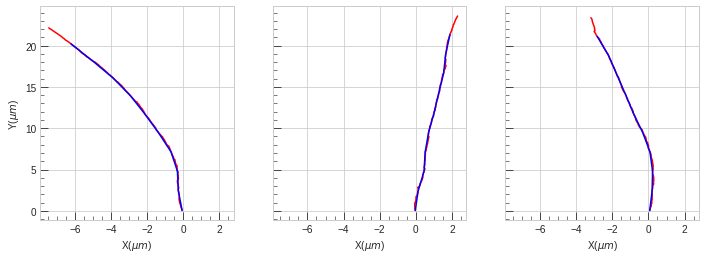

In [77]:
fig, ax = plt.subplots(1,3, figsize=(30*cm, 10*cm), sharex = True, sharey = True)

ax[0].plot(xy0[0]['x'], xy0[0]['y'], color='red')
ax[0].plot(conf0[0]['x'], conf0[0]['y'], color='blue')
ax[0].minorticks_on()
ax[0].tick_params('both', direction='in', length=8, which='major')
ax[0].tick_params('both', direction='in', length=4, which='minor')
ax[0].set_xlabel('X($\mu m$)')
ax[0].set_ylabel('Y($\mu m$)')

ax[1].plot(xy0[1]['x'], xy0[1]['y'], color='red')
ax[1].plot(conf0[1]['x'], conf0[1]['y'], color='blue')
ax[1].minorticks_on()
ax[1].tick_params('both', direction='in', length=8, which='major')
ax[1].tick_params('both', direction='in', length=4, which='minor')
ax[1].set_xlabel('X($\mu m$)')

ax[2].plot(xy0[2]['x'], xy0[2]['y'], color='red')
ax[2].plot(conf0[2]['x'], conf0[2]['y'], color='blue')
ax[2].minorticks_on()
ax[2].tick_params('both', direction='in', length=8, which='major')
ax[2].tick_params('both', direction='in', length=4, which='minor')
ax[2].set_xlabel('X($\mu m$)')

#plt.savefig('fig/may/Traj5-may-md40-Dt3.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [78]:
ubx0 = []; uby0 = []
ubx_1 = []; uby_1 = []
ubx1 = []; uby1 = []

for i in range(len(xdiff0)):
    b0 = np.sqrt(xdiff0[i]**2 + ydiff0[i]**2)
    ubx0.append(xdiff0[i]/b0)
    uby0.append(ydiff0[i]/b0)


In [79]:
ub0 = []; ub_1 = []; ub1 = []

for i in range(len(ubx0)):
    ub0.append(pd.DataFrame({'ubx':ubx0[i], 'uby':uby0[i]}))
    

In [80]:
len(ub0)

30

In [81]:
_ = []; ds0 = []; dsm0 = []; s0 = []; c = 0; ds0_ = []; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub0)):
    for i in range(len(ub0[h])): # -1
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub0[h])): # -1
            try:
                _.append(np.dot(ub0[h].loc[j].values,ub0[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        ds0_.append(_) # not necessary to save or is it?
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1;
    s0.append(s_)
    dsm0.append(dsm_)
    ds0.append(ds0_)
    c = 0; ds0_ = []; dsm_ = []; s_ = [] # reset stuff

s0 = np.array(s0)
#ds0 = np.array(ds0)
dsm0 = np.array(dsm0)

In [82]:

dfs0 = pd.DataFrame(s0.T)
dfdsm0 = pd.DataFrame(dsm0.T)

s0_m = dfs0.mean(axis=1)*v00*Dt
dsm0_m = dfdsm0.mean(axis=1)

#=========================================================

In [83]:
dfs0

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
6,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
8,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [84]:
dfdsm0

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996548,0.998279,0.998300,0.998236,0.996027,0.996570,0.999217,0.998721,0.997004,0.998239,...,0.997342,0.997858,0.995649,0.996182,0.997261,0.998161,0.999683,0.999232,0.996138,0.997871
2,0.989008,0.998657,0.994555,0.994356,0.990164,0.987238,0.998241,0.998016,0.992006,0.997155,...,0.992619,0.994804,0.990741,0.986106,0.994156,0.996782,0.999321,0.998361,0.993991,0.995211
3,0.979157,0.998877,0.989477,0.990554,0.983048,0.972483,0.997403,0.996984,0.991764,0.998934,...,0.988948,0.988841,0.989807,0.967916,0.990829,0.996649,0.999060,0.998211,0.995824,0.992847
4,0.968356,0.998692,0.986436,0.989024,0.981351,0.952662,0.996671,0.997744,0.994267,0.998022,...,0.984190,0.978564,0.987554,0.944215,0.991501,0.996792,0.998437,0.998142,0.997423,0.992959
5,0.950001,0.999630,0.983745,0.990160,0.983392,0.931338,0.996405,0.996793,0.993672,0.996965,...,0.981872,0.969178,0.981212,0.919012,0.991453,0.996213,0.997564,0.997729,0.992003,0.993757
6,0.920779,0.997653,0.975344,0.992596,0.989757,0.921355,0.995050,0.996352,0.991914,0.999105,...,0.978879,0.962892,0.976274,0.902029,0.996024,0.998083,0.996613,0.996470,0.985080,0.996176
7,0.895532,0.999541,0.965263,0.992489,0.992992,0.925478,0.994363,0.995981,0.992883,0.998193,...,0.963848,0.952421,0.987768,0.901931,0.997776,0.998831,0.997275,0.995161,0.986369,0.996391
8,0.905861,0.999580,0.948580,0.989129,0.994398,0.922352,0.994370,0.997861,0.995404,0.988305,...,0.948162,0.957035,0.985545,0.896035,0.999945,0.997831,0.998122,0.996764,0.998049,0.998084


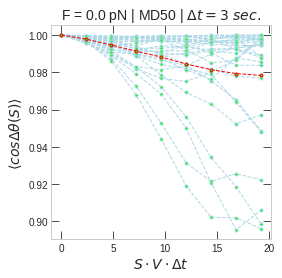

In [85]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

dts = [0.05,0.1,0.2,0.3,0.5]; c=4

# for i in range(len(s0m)):
#     ax.plot(s0m[i],dsm0[i], marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = %.2f sec.$'%dts[c])
#     #c+=1
for i in range(0,30): #7
    ax.plot(s0_m,dfdsm0[i], marker='o', markersize=3, ls='--', lw=1, color='lightblue', markerfacecolor='lime')#, label=r'$\Delta t = %.2f sec.$'%dts[c])
#for i in range(27,30): #7
#    ax.plot(dfs0[i],dfdsm0[i], marker='o', markersize=3, ls='--', lw=1, color='blue', markerfacecolor='lime')#, label=r'$\Delta t = %.2f sec.$'%dts[c])

#ax.plot(dfs0[19],dfdsm0[19], marker='o', markersize=3, ls='--', lw=1, color='blue', markerfacecolor='lime')
    
ax.plot(s0_m,dsm0_m, marker='o', markersize=3, ls='--', lw=1, color='red', markerfacecolor='lime')

#ax.minorticks_on()
ax.tick_params('both', direction='in', top=True, right=True, length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$\langle cos \Delta \theta (S) \rangle$', fontsize=14)

#ax.set_title('F = 0.0 pN | MD10 | $\Delta t = 0.1 sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD10', fontsize=14)
#ax.set_title('F = 0.0 pN | MD10 | $\Delta t = 1 sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD10 | $\Delta t = 3\ sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD20', fontsize=14)
#ax.set_title('F = 0.0 pN | MD20 | $\Delta t = 3\ sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD40 | $\Delta t = 3\ sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD40', fontsize=14)
#ax.set_title('F = 0.0 pN | MD30', fontsize=14)
#ax.set_title('F = 0.0 pN | MD30 | $\Delta t = 3\ sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD50 | $\Delta t = 1\ sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD50', fontsize=14)
ax.set_title('F = 0.0 pN | MD50 | $\Delta t = 3\ sec.$', fontsize=14)
#plt.legend()
plt.grid(0)

#plt.savefig('fig/may/LpAllT5-may-md10-Dt0.1.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md10.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md10-Dt1.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md10-Dt3.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md20.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md20-Dt3.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md30.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md30-Dt3.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md40.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md40-Dt3.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md50.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md50-Dt1.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/LpAllT5-may-md50-Dt3.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [86]:
x = s0_m 
y = dsm0_m 
y = np.log(y)

In [87]:
def func(x,Lp):
    return 1*(-x/(2*Lp))
popt, pcov = curve_fit(func, x, y)


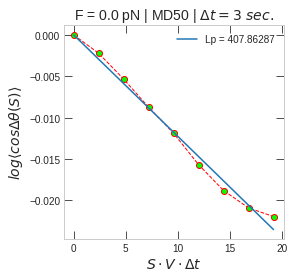

In [88]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharey=True)

ax.plot(x,y, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')#, label=r'$\Delta t = 0.1 sec.$')
ax.plot(x, func(x,*popt), label='Lp = %s'%np.round(popt[0],6))

#ax.minorticks_on()
ax.tick_params('both', direction='in', top=True, right=True, length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$log \langle cos \Delta \theta (S) \rangle$', fontsize=14)

#ax.set_title('F = 0.0 pN | MD10 | $\Delta t = 0.1 sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD10', fontsize=14)
#ax.set_title('F = 0.0 pN | MD10 | $\Delta t = 1 sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD10 | $\Delta t = 3\ sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD20', fontsize=14)
#ax.set_title('F = 0.0 pN | MD20 | $\Delta t = 3\ sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD30', fontsize=14)
#ax.set_title('F = 0.0 pN | MD30 | $\Delta t = 3\ sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD40', fontsize=14)
#ax.set_title('F = 0.0 pN | MD40 | $\Delta t = 3\ sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD50', fontsize=14)
#ax.set_title('F = 0.0 pN | MD50 | $\Delta t = 1\ sec.$', fontsize=14)
#ax.set_title('F = 0.0 pN | MD50 | $\Delta t = 3\ sec.$', fontsize=14)

ax.legend()
plt.grid(0)

#plt.savefig('fig/may/Lp-md10-Dt0.1.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md10.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md10-Dt1.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md10-Dt3.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md20.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md20-Dt3.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md30.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md30-Dt3.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md40-Dt3.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md40.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md50.pdf', format='pdf', bbox_inches='tight') 
#plt.savefig('fig/may/Lp-md50-Dt1.pdf', format='pdf', bbox_inches='tight')
#plt.savefig('fig/may/Lp-md50-Dt3.pdf', format='pdf', bbox_inches='tight')

plt.show()